https://www.kaggle.com/datasets/ranjitmandal/fraud-detection-dataset-csv

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualização dos dados

In [129]:
fraude = pd.read_csv('/content/drive/MyDrive/Trabalho Aprendizado de maquina /Fraud Detection Dataset/Fraud Detection Dataset.csv')
pd.set_option('display.max_columns', None)

In [130]:
fraude

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [131]:
fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [132]:
fraude.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [133]:
fraude.nunique()

,0
Transaction_ID,50000
User_ID,4000
Transaction_Amount,44821
Transaction_Type,5
Time_of_Transaction,24
Device_Used,4
Location,8
Previous_Fraudulent_Transactions,5
Account_Age,119
Number_of_Transactions_Last_24H,14


# Tratamento de valores ausentes

In [134]:
fraude.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,2520
Transaction_Type,0
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


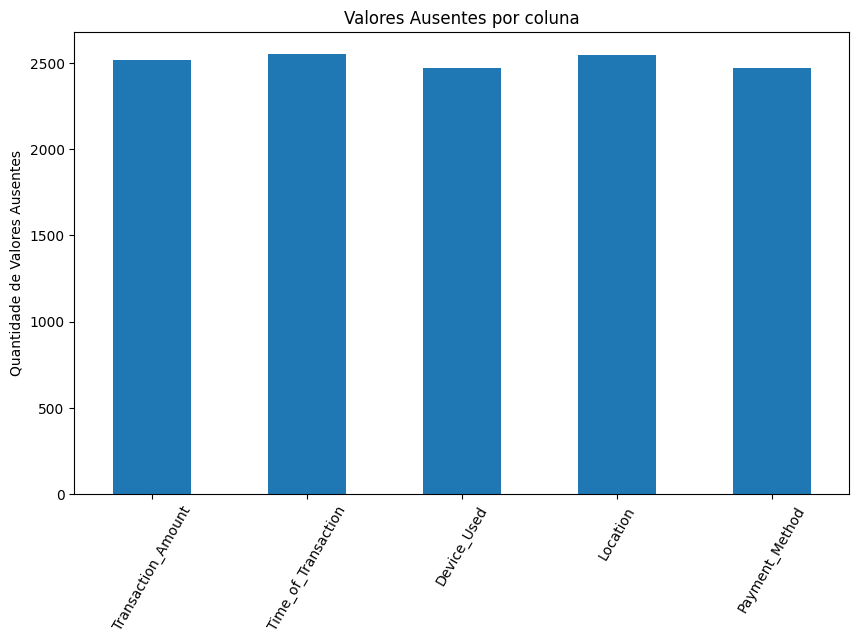

In [135]:
## Valores ausentes
plt.figure(figsize=(10,6))
fraude_ausente = fraude.loc[:, fraude.isnull().any()]
fraude_ausente.isnull().sum().plot(kind='bar')
plt.title('Valores Ausentes por coluna')
plt.ylabel('Quantidade de Valores Ausentes')
plt.xticks(rotation=60)
plt.show()

## Location
Explorando padrões relacionados a Location

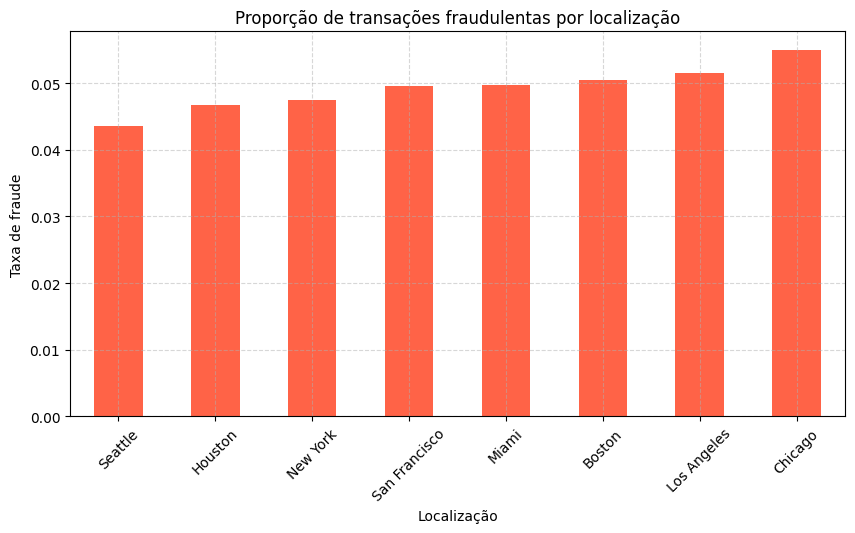

In [72]:
fraudes_por_local = fraude.groupby('Location')['Fraudulent'].mean().sort_values()
plt.figure(figsize=(10, 5))
fraudes_por_local.plot(kind='bar', color='tomato')
plt.title('Proporção de transações fraudulentas por localização')
plt.ylabel('Taxa de fraude')
plt.xlabel('Localização')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Como todos os locais tem praticamente o mesmo padrão de fraude, e a taxa de fraude por localização varia muito pouco como pode ser visto na tabela acima, a variável Location não adiciona informação útil ao modelo. Logo, com técnicas como One-Hot encoding seriam criadas 8 novas colunas que aumentariam a dimensionalide sem ajudar o modelo a aprender padrões, então decidimos remover esta coluna.

In [73]:
fraude = fraude.drop(columns=['Location'])

## Device_Used
Explorando padrões relacionados a Device_Used

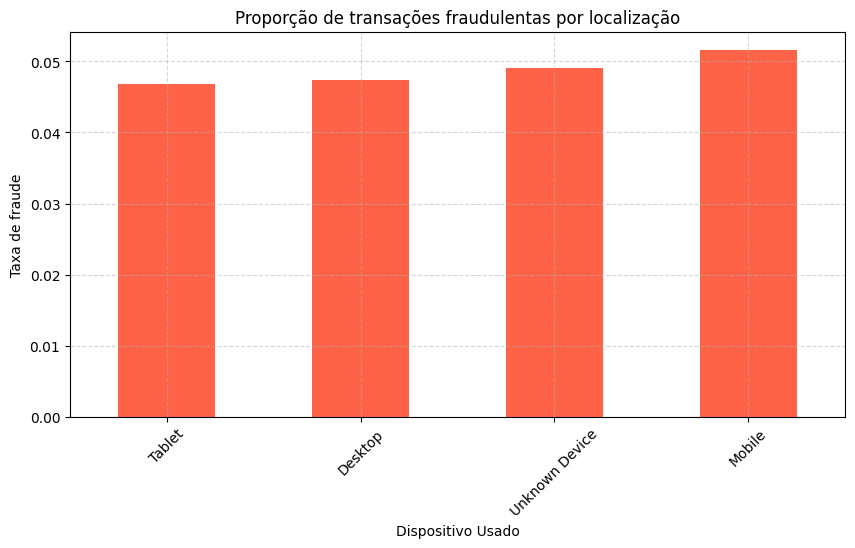

In [74]:
fraudes_por_local = fraude.groupby('Device_Used')['Fraudulent'].mean().sort_values()
plt.figure(figsize=(10, 5))
fraudes_por_local.plot(kind='bar', color='tomato')
plt.title('Proporção de transações fraudulentas por localização')
plt.ylabel('Taxa de fraude')
plt.xlabel('Dispositivo Usado')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [75]:
fraude.loc[fraude['Device_Used'].isnull()]

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
14,T15,3135,968.78,ATM Withdrawal,15.0,NaN,1,52,13,Net Banking,0
17,T18,3919,2327.71,Online Purchase,20.0,NaN,4,21,1,Debit Card,0
24,T25,2515,2715.14,POS Payment,4.0,NaN,1,71,10,Net Banking,0
64,T65,3214,3955.87,Bill Payment,20.0,NaN,4,106,4,UPI,0
76,T77,2363,3278.76,Bank Transfer,3.0,NaN,2,107,13,UPI,0
...,...,...,...,...,...,...,...,...,...,...,...
50867,T28857,3660,2711.19,POS Payment,2.0,NaN,4,65,7,NaN,0
50881,T41513,4459,1562.88,POS Payment,14.0,NaN,2,11,10,Debit Card,0
50898,T46982,4731,759.75,POS Payment,13.0,NaN,2,96,2,Debit Card,0
50905,T29805,4726,3640.65,ATM Withdrawal,13.0,NaN,2,32,13,Debit Card,0


In [76]:
# Porporção de valores ausentes em device_used
missing_percentage = (fraude['Device_Used'].isnull().sum() / len(fraude)) * 100
print(f"Proporção: {missing_percentage:.2f}%")

Proporção: 4.85%


Como a proporção de valores ausentes é pequena (4.85%), e ja existe uma categoria "Unknown Device" na variável Device_Used, então vamos preencher os valores faltantes com "Unknown Device".

In [77]:
print("Valores ausentes --> ",fraude['Device_Used'].isnull().sum())

Valores ausentes -->  2473


In [78]:
fraude['Device_Used'] = fraude['Device_Used'].fillna("Unknown Device")

In [79]:
print("Valores ausentes --> ",fraude['Device_Used'].isnull().sum())

Valores ausentes -->  0


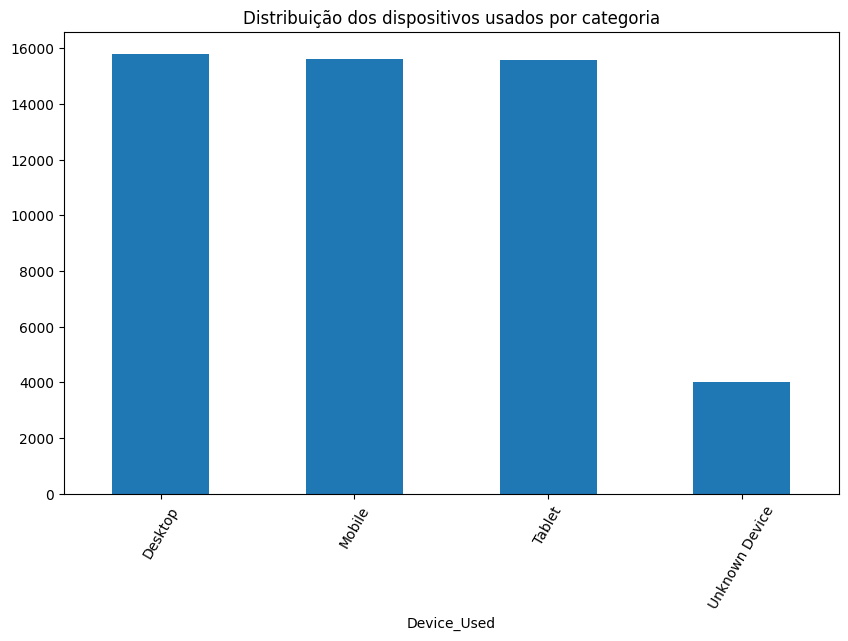

In [80]:
plt.figure(figsize=(10,6))
fraude['Device_Used'].value_counts().plot(kind='bar')
plt.title('Distribuição dos dispositivos usados por categoria')
plt.xticks(rotation=60)
plt.show()

## Payment_Method

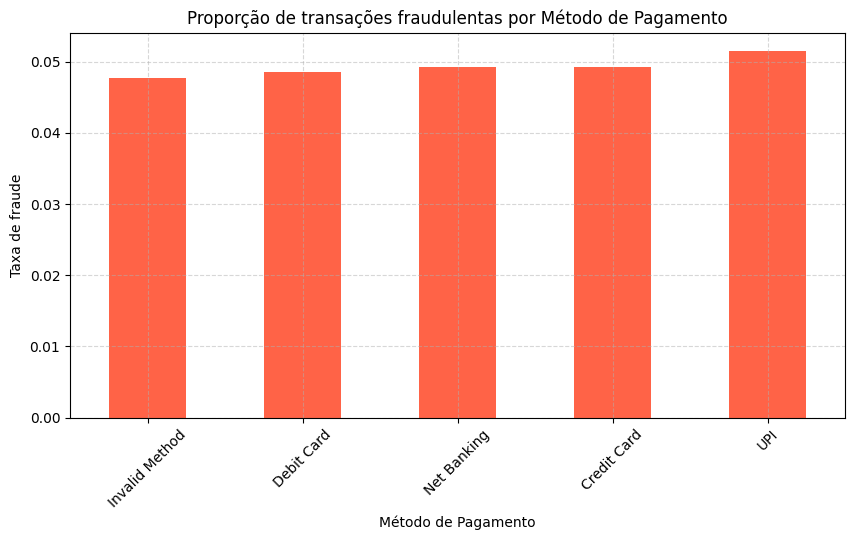

In [81]:
fraudes_por_local = fraude.groupby('Payment_Method')['Fraudulent'].mean().sort_values()
plt.figure(figsize=(10, 5))
fraudes_por_local.plot(kind='bar', color='tomato')
plt.title('Proporção de transações fraudulentas por Método de Pagamento')
plt.ylabel('Taxa de fraude')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [82]:
fraude.loc[fraude['Payment_Method'].isnull()]

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,3,115,9,NaN,0
39,T40,1474,2411.20,Bank Transfer,19.0,Mobile,4,14,12,NaN,0
70,T71,1241,2236.06,POS Payment,9.0,Mobile,2,63,3,NaN,0
77,T78,3139,1369.45,Online Purchase,0.0,Desktop,2,78,3,NaN,0
94,T95,3613,1961.58,ATM Withdrawal,17.0,Mobile,0,30,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
50867,T28857,3660,2711.19,POS Payment,2.0,Unknown Device,4,65,7,NaN,0
50883,T17673,1521,4299.51,Bank Transfer,20.0,Desktop,4,111,13,NaN,0
50923,T28389,2876,1714.82,Online Purchase,18.0,Mobile,2,115,1,NaN,0
50964,T44427,1830,4187.49,Bank Transfer,4.0,Mobile,2,67,13,NaN,0


In [83]:
# Porporção de valores ausentes em Payment_Method
missing_percentage = (fraude['Payment_Method'].isnull().sum() / len(fraude)) * 100
print(f"Proporção: {missing_percentage:.2f}%")
print(f"Valores ausentes --> {fraude['Payment_Method'].isnull().sum()}")

Proporção: 4.84%
Valores ausentes --> 2469


Relação entre Payment_Method e device_used

In [84]:
# Frequência de Payment_Method por Device_Used
print(fraude.groupby('Payment_Method')['Device_Used'].value_counts().unstack(fill_value=0).head(10))

Device_Used     Desktop  Mobile  Tablet  Unknown Device
Payment_Method                                         
Credit Card        3683    3602    3456             905
Debit Card         3694    3589    3623             896
Invalid Method      500     450     445             135
Net Banking        3545    3594    3598             929
UPI                3614    3614    3733             926


Relação entre Payment_Method e Transaction_Type

In [85]:
# Frequência de Payment_Method por Transaction_Type
print(fraude.groupby('Payment_Method')['Transaction_Type'].value_counts().unstack(fill_value=0).head(10))

Transaction_Type  ATM Withdrawal  Bank Transfer  Bill Payment  \
Payment_Method                                                  
Credit Card                 2276           2339          2329   
Debit Card                  2331           2414          2365   
Invalid Method               298            321           328   
Net Banking                 2338           2326          2359   
UPI                         2441           2386          2430   

Transaction_Type  Online Purchase  POS Payment  
Payment_Method                                  
Credit Card                  2363         2339  
Debit Card                   2331         2361  
Invalid Method                282          301  
Net Banking                  2310         2333  
UPI                          2324         2306  


Novamente para preservar os dados, já que não foram encontrados padrões claros, vamos substiuir os valores ausentes por "Unknown".

In [86]:
print("Valores ausentes --> ",fraude['Payment_Method'].isnull().sum())

Valores ausentes -->  2469


In [87]:
fraude['Payment_Method'] = fraude['Payment_Method'].fillna("Unknown")

In [88]:
print("Valores ausentes --> ",fraude['Payment_Method'].isnull().sum())

Valores ausentes -->  0


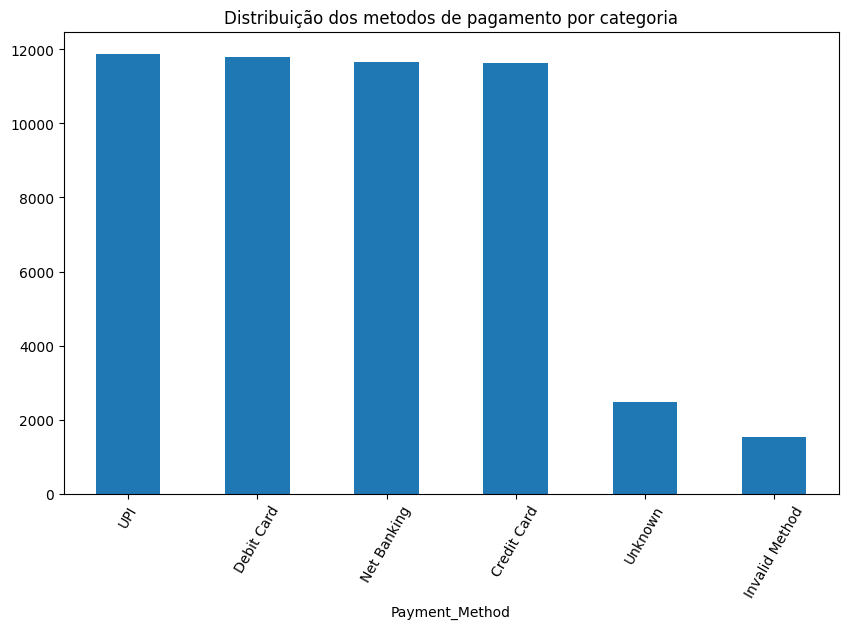

In [89]:
plt.figure(figsize=(10,6))
fraude['Payment_Method'].value_counts().plot(kind='bar')
plt.title('Distribuição dos metodos de pagamento por categoria')
plt.xticks(rotation=60)
plt.show()

## Resumo do tratamento de valores ausentes para as variáveis categoricas
Decidimos remover a variável Location porque a taxa de fraude por localização variou muito pouco entre as categorias. Além disso, sua codificação com One-Hot resultaria em 8 novas colunas, o que aumentaria a dimensionalidade do dataset sem benefícios reais ao aprendizado do modelo. Essa abordagem poderia ser diferente caso o objetivo fosse interpretar padrões de fraude por região.

Já em Payment_Method, foi criada uma nova categoria "Unknown" para representar valores ausentes, e em Device_Used utilizamos a categoria já existente "Unknown Device". Apesar da proporção de valores ausentes ser inferior a 5% em ambas as variáveis (o que justificaria sua exclusão), optamos por preservar os dados, evitando excluir transações que poderiam ser relevantes.

## Transaction_Amount

In [90]:
fraude.loc[fraude['Transaction_Amount'].isnull()]

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
10,T11,1466,NaN,Online Purchase,3.0,Tablet,1,4,6,Net Banking,0
23,T24,3391,NaN,ATM Withdrawal,7.0,Mobile,3,8,10,Net Banking,0
25,T26,4485,NaN,Online Purchase,17.0,Mobile,2,63,8,UPI,0
49,T50,4005,NaN,ATM Withdrawal,4.0,Mobile,3,10,7,Debit Card,0
111,T112,1455,NaN,Online Purchase,18.0,Mobile,1,116,11,UPI,0
...,...,...,...,...,...,...,...,...,...,...,...
50871,T27099,4706,NaN,Bill Payment,13.0,Tablet,4,38,11,Credit Card,0
50893,T38314,2796,NaN,Bill Payment,5.0,Mobile,2,12,14,Credit Card,0
50902,T18693,4505,NaN,ATM Withdrawal,14.0,Mobile,4,17,8,Credit Card,0
50943,T21762,1823,NaN,POS Payment,NaN,Tablet,1,57,5,Debit Card,0


In [91]:
# Porporção de valores ausentes em Transaction_Amount
print(f"Proporção: {(fraude['Transaction_Amount'].isnull().sum() / len(fraude)) * 100:.2f}%")
print(f"Valores ausentes --> {fraude['Transaction_Amount'].isnull().sum()}")

Proporção: 4.94%
Valores ausentes --> 2520


Distribuição de Transaction_Amount por Transaction_Type

In [92]:
print(fraude.groupby('Transaction_Type')['Transaction_Amount'].mean())

Transaction_Type
ATM Withdrawal     2977.734152
Bank Transfer      3032.651571
Bill Payment       3038.556278
Online Purchase    2988.188041
POS Payment        2942.371743
Name: Transaction_Amount, dtype: float64


Distribuição de Transaction_Amount por Payment_Method

In [93]:
print(fraude.groupby('Payment_Method')['Transaction_Amount'].mean())

Payment_Method
Credit Card       3027.154358
Debit Card        3006.691622
Invalid Method    2994.586770
Net Banking       2950.764223
UPI               2976.236199
Unknown           3111.120488
Name: Transaction_Amount, dtype: float64


As medias são muito proximas mas possuem diferenças sutis. Então vamos utilizar a imputação por mediana global para preservar a estrutura dos dados

In [94]:
fraude['Transaction_Amount'] = fraude['Transaction_Amount'].fillna(fraude['Transaction_Amount'].median())

In [95]:
print(f"Valores ausentes após imputação: {fraude['Transaction_Amount'].isnull().sum()}")

Valores ausentes após imputação: 0


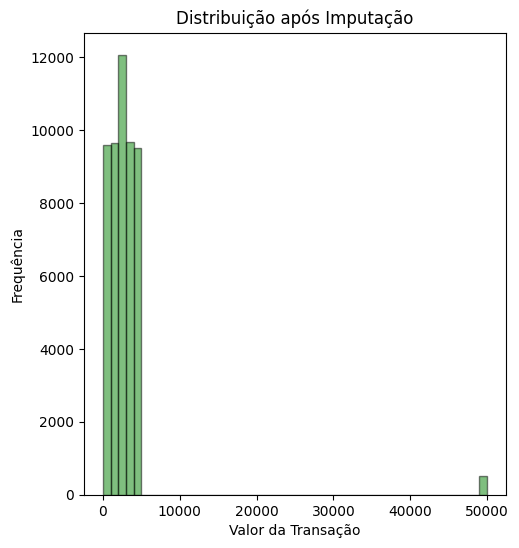

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(fraude['Transaction_Amount'], bins=50, color='green', alpha=0.5, edgecolor='black')
plt.title("Distribuição após Imputação")
plt.xlabel("Valor da Transação")
plt.ylabel("Frequência")
plt.show()

Existem outliers a ser tratados

## Time_of_Transaction

In [97]:
fraude.loc[fraude['Time_of_Transaction'].isnull()]

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,3,115,9,Unknown,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,4,110,12,Debit Card,0
48,T49,1189,470.84,POS Payment,NaN,Tablet,1,70,3,Net Banking,0
57,T58,2528,2382.83,POS Payment,NaN,Unknown Device,0,27,14,Credit Card,0
129,T130,1379,4261.91,Online Purchase,NaN,Tablet,0,112,5,Net Banking,0
...,...,...,...,...,...,...,...,...,...,...,...
50913,T48346,3523,1240.54,Online Purchase,NaN,Tablet,2,41,14,Credit Card,0
50943,T21762,1823,2524.10,POS Payment,NaN,Tablet,1,57,5,Debit Card,0
50946,T32457,4494,296.64,Bank Transfer,NaN,Desktop,0,105,6,Net Banking,0
50952,T10076,2798,1775.37,Online Purchase,NaN,Desktop,4,33,4,Credit Card,1


In [98]:
print(f"Proporção: {(fraude['Time_of_Transaction'].isnull().sum() / len(fraude)) * 100:.2f}%")
print(f"Valores ausentes --> {fraude['Time_of_Transaction'].isnull().sum()}")

Proporção: 5.00%
Valores ausentes --> 2552


Distribuição de Time_of_Transaction por Transaction_Type

In [99]:
print(fraude.groupby('Transaction_Type')['Time_of_Transaction'].mean())

Transaction_Type
ATM Withdrawal     11.499948
Bank Transfer      11.433995
Bill Payment       11.432534
Online Purchase    11.587972
POS Payment        11.489530
Name: Time_of_Transaction, dtype: float64


Distribuição de Time_of_Transaction por Payment_Method

In [100]:
print(fraude.groupby('Payment_Method')['Time_of_Transaction'].mean())

Payment_Method
Credit Card       11.497639
Debit Card        11.471176
Invalid Method    11.245152
Net Banking       11.420264
UPI               11.584082
Unknown           11.535533
Name: Time_of_Transaction, dtype: float64


In [101]:
print(fraude.groupby('Fraudulent')['Time_of_Transaction'].mean())

Fraudulent
0    11.477340
1    11.702862
Name: Time_of_Transaction, dtype: float64


Como não foram encontrados padrões fortes entre Time_of_Transaction e as outras variaveis, então vamos fazer a imputação dos dados faltantes pela mediana global

In [102]:
fraude['Time_of_Transaction'] = fraude['Time_of_Transaction'].fillna(fraude['Time_of_Transaction'].median())

In [103]:
print("Valores ausentes restantes:", fraude['Time_of_Transaction'].isnull().sum())

Valores ausentes restantes: 0


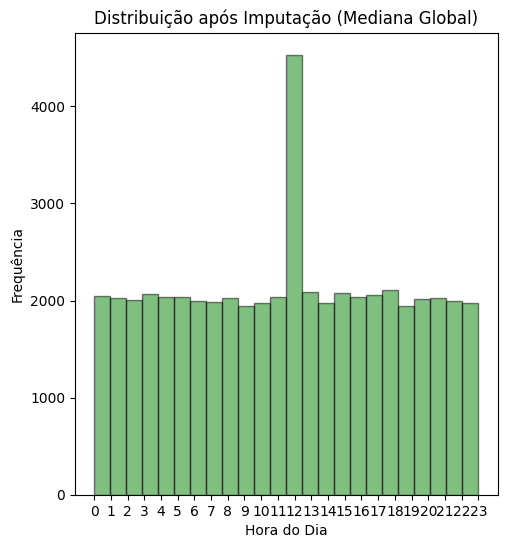

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(fraude['Time_of_Transaction'], bins=24, color='green', alpha=0.5, edgecolor='black')
plt.title("Distribuição após Imputação (Mediana Global)")
plt.xlabel("Hora do Dia")
plt.ylabel("Frequência")
plt.xticks(range(0, 24))
plt.show()

In [105]:
fraude.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0
Payment_Method,0


# Tratamento de duplicatas

Verificação e tratamento de duplicatas



In [106]:
# Duplicatas exatas
duplicatas_exatas = fraude[fraude.duplicated()]
print(f"Total de duplicatas exatas: {fraude.duplicated().sum()}")
display(duplicatas_exatas)

Total de duplicatas exatas: 883


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50000,T33554,2669,2425.71,Bank Transfer,14.0,Tablet,2,40,7,UPI,0
50001,T9428,1001,2448.53,Bank Transfer,19.0,Mobile,4,7,3,Unknown,0
50002,T200,3790,4429.89,ATM Withdrawal,17.0,Unknown Device,1,39,6,UPI,1
50003,T12448,1743,108.00,ATM Withdrawal,15.0,Tablet,3,67,9,Credit Card,0
50004,T39490,4329,2320.30,ATM Withdrawal,4.0,Desktop,3,12,10,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
50993,T5873,4911,3613.59,Online Purchase,11.0,Tablet,3,58,7,Net Banking,0
50994,T48244,4842,1587.84,POS Payment,10.0,Tablet,1,94,6,UPI,0
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,1,75,11,Net Banking,1


In [107]:
fraude[fraude.duplicated()].groupby('Fraudulent').size()

,0
Fraudulent,
0,840
1,43


Das duplicatas exatas, temos 840 que não são fraudes e 43 que são fraudes, se removermos as duplicatas que são fraudes corremos o risco de remover registros de fraudes, o que pode desequilibrar o dataset. As duplicatas que são fraudes podem representar fraudes repetidas, e as duplicatas de transações legítimas(não fraudulentas) povavelmente são dados redundantes que podem ser ecluidos sem muito risco

In [108]:
duplicatas_exatas = fraude[fraude.duplicated(keep=False)]
duplicatas_fraude = duplicatas_exatas[duplicatas_exatas['Fraudulent']==1]

fraude_sem_duplicatas = fraude.drop_duplicates(keep=False)
fraude = pd.concat([fraude_sem_duplicatas, duplicatas_fraude], ignore_index=True)
fraude[fraude['Fraudulent'] == 1].duplicated().sum()

np.int64(43)

In [109]:
fraude[fraude.duplicated()].groupby('Fraudulent').size()

,0
Fraudulent,
1,43


As duplicatas exatas legítimas foram removidas e as fraudulentas foram mantidas no dataset

Vamos analisar agora as duplicatas que não são completamente iguais mas compartilham o mesmo valor de Transaction_ID

In [110]:
# Duplicatas com base na coluna Transaction_ID
duplicatas_trasacao = fraude[fraude.duplicated(subset='Transaction_ID')]
display(duplicatas_trasacao)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49117,T49499,4979,2676.53,POS Payment,6.0,Mobile,2,40,5,Invalid Method,0
49118,T49718,2176,4521.19,Online Purchase,7.0,Unknown Device,1,110,8,Unknown,0
49119,T726,1089,4083.96,Online Purchase,16.0,Tablet,0,18,7,Credit Card,0
49120,T32208,2573,4213.24,ATM Withdrawal,5.0,Desktop,1,27,9,Invalid Method,0
49121,T33071,2617,2524.10,Online Purchase,14.0,Tablet,2,15,13,Debit Card,0
...,...,...,...,...,...,...,...,...,...,...,...
49315,T10076,2798,1775.37,Online Purchase,12.0,Desktop,4,33,4,Credit Card,1
49316,T8854,4617,1368.90,POS Payment,12.0,Tablet,3,81,2,Credit Card,1
49317,T3468,3176,2225.91,Online Purchase,16.0,Mobile,1,103,9,Net Banking,1
49318,T15074,3212,819.70,Bank Transfer,20.0,Tablet,0,67,4,Credit Card,1


In [111]:
fraude[fraude.duplicated(subset='Transaction_ID')].groupby('Fraudulent').size()

,0
Fraudulent,
0,110
1,50


In [112]:
for i in ['T49499','T33071','T32208','T726','T49718','T15074','T3468','T31261','T8854','T10076']:
  display(fraude[fraude['Transaction_ID']==i])

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
48626,T49499,4979,2676.53,POS Payment,6.0,Mobile,2,40,5,Credit Card,0
49117,T49499,4979,2676.53,POS Payment,6.0,Mobile,2,40,5,Invalid Method,0


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
32486,T33071,2617,2524.1,Online Purchase,14.0,Tablet,2,15,13,Invalid Method,0
49121,T33071,2617,2524.1,Online Purchase,14.0,Tablet,2,15,13,Debit Card,0


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
31633,T32208,2573,4213.24,ATM Withdrawal,5.0,Desktop,1,27,9,Credit Card,0
49120,T32208,2573,4213.24,ATM Withdrawal,5.0,Desktop,1,27,9,Invalid Method,0


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
715,T726,1089,4083.96,Online Purchase,16.0,Unknown Device,0,18,7,Credit Card,0
49119,T726,1089,4083.96,Online Purchase,16.0,Tablet,0,18,7,Credit Card,0


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
48838,T49718,2176,4521.19,Online Purchase,7.0,Desktop,1,110,8,Unknown,0
49118,T49718,2176,4521.19,Online Purchase,7.0,Unknown Device,1,110,8,Unknown,0


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49252,T15074,3212,819.7,Bank Transfer,20.0,Tablet,0,67,4,Credit Card,1
49318,T15074,3212,819.7,Bank Transfer,20.0,Tablet,0,67,4,Credit Card,1


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49237,T3468,3176,2225.91,Online Purchase,16.0,Mobile,1,103,9,Net Banking,1
49317,T3468,3176,2225.91,Online Purchase,16.0,Mobile,1,103,9,Net Banking,1


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49263,T31261,2152,2897.15,Online Purchase,3.0,Mobile,1,75,11,Net Banking,1
49319,T31261,2152,2897.15,Online Purchase,3.0,Mobile,1,75,11,Net Banking,1


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49243,T8854,4617,1368.9,POS Payment,12.0,Tablet,3,81,2,Credit Card,1
49316,T8854,4617,1368.9,POS Payment,12.0,Tablet,3,81,2,Credit Card,1


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
49246,T10076,2798,1775.37,Online Purchase,12.0,Desktop,4,33,4,Credit Card,1
49315,T10076,2798,1775.37,Online Purchase,12.0,Desktop,4,33,4,Credit Card,1


São 110 transações legítimas, e 50 transações de fraude com o mesmo ID, esses casos podem significar:
*   Tentativas de fraude repetida com pequenas alterações
*   Erros de entrada dos dados

Neste caso, mantemos todos os dados duplicados de fraude novamente, porém, removemos as duplicatas de transações legítimas pois representam ruído

In [113]:
duplicatas_tid = fraude[fraude.duplicated(subset='Transaction_ID', keep=False)]

duplicatas_tid_legitimas = duplicatas_tid[duplicatas_tid['Fraudulent'] == 0]

fraude = fraude.drop(duplicatas_tid_legitimas.index)

In [114]:
fraude[fraude.duplicated(subset='Transaction_ID')].groupby('Fraudulent').size()

,0
Fraudulent,
1,50


# Codificação de variáveis categóricas

In [115]:
variaveis_categoricas = fraude.select_dtypes(include=['object', 'category']).nunique().sort_values(ascending=False)
variaveis_categoricas

,0
Transaction_ID,49050
Payment_Method,6
Transaction_Type,5
Device_Used,4


## Técnicas Escolhidas


<table>
  <thead>
    <tr>
      <th>Variável</th>
      <th>N° categorias</th>
      <th>Tecnica de codificação</th>
      <th>Justificativa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Payment_Method</td>
      <td>6</td>
      <td>One-Hot Encoding</td>
      <td>Variável Nominal com poucas categorias</td>
    </tr>
    <tr>
      <td>Transaction_type</td>
      <td>5</td>
      <td>One-Hot Encoding</td>
      <td>Variável Nominal com poucas categorias</td>
    </tr>
    <tr>
      <td>Device_Used</td>
      <td>4</td>
      <td>One-Hot Encoding</td>
      <td>Variável Nominal com poucas categorias</td>
    </tr>
  </tbody>
</table>

## One-Hot Encoding
Variveis qúe decidimos usar o One-Hot Encoding estão sendo tratadas aqui

In [116]:
variaveis_para_codificar = ['Transaction_Type', 'Payment_Method', 'Device_Used']
fraude = pd.get_dummies(fraude, columns=variaveis_para_codificar, drop_first=False)
display(fraude.head())

,Transaction_ID,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,T1,4174,1292.76,16.0,0,119,13,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,T2,4507,1554.58,13.0,4,79,3,0,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,T3,1860,2395.02,12.0,3,115,9,0,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,T4,2294,100.10,15.0,4,3,4,0,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,T6,2095,2372.04,15.0,3,96,14,0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False


# Outliers
Aqui detectamos outliers nas variáveis numéricas como Transaction_Amount e Time_of_Transaction

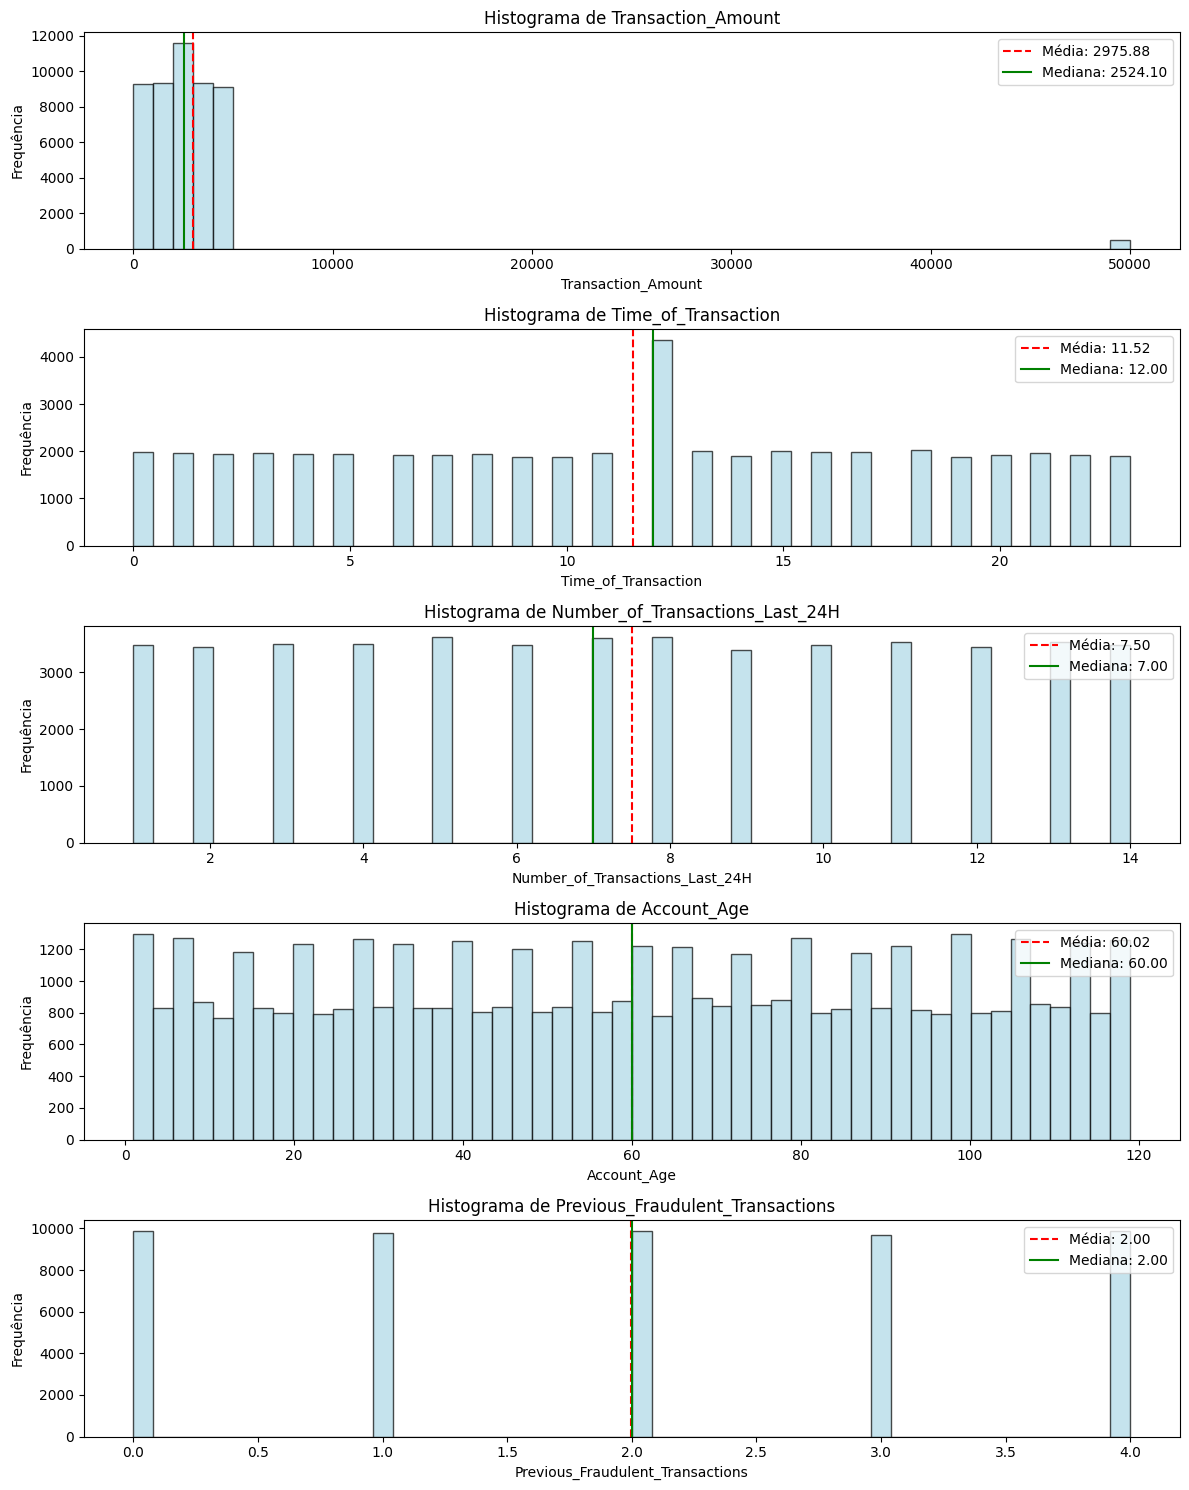

In [117]:
variaveis = ['Transaction_Amount', 'Time_of_Transaction', 'Number_of_Transactions_Last_24H', 'Account_Age', 'Previous_Fraudulent_Transactions']


fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15))

for i, col in enumerate(variaveis):
    media = fraude[col].mean()
    mediana = fraude[col].median()

    axes[i].hist(fraude[col], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
    axes[i].axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')

    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [118]:
# Calcula IQR
Q1 = fraude['Transaction_Amount'].quantile(0.25)
Q3 = fraude['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_amount = fraude[(fraude['Transaction_Amount'] < limite_inferior) | (fraude['Transaction_Amount'] > limite_superior)]
print(f"Outliers em Transaction_Amount: {len(outliers_amount)}")

fraud_rate_outliers = outliers_amount['Fraudulent'].mean()
fraud_rate_normal = fraude[~fraude.index.isin(outliers_amount.index)]['Fraudulent'].mean()

print(f"Fraude Rate em outliers: {fraud_rate_outliers:.2%}")
print(f"Fraude Rate em valores normais: {fraud_rate_normal:.2%}")


Outliers em Transaction_Amount: 494
Fraude Rate em outliers: 6.48%
Fraude Rate em valores normais: 5.10%


Transaction_Amount é a unica variável que contém outliers. Os outliers nessa variável são importantes pois aa taxa de fraude neles é maior que em transações normais.

Como os outliers representam uma taxa maior das fraudes, remove-los pode eliminar padrões importantes pra detectar atividades suspeitas. Portanto decidimos não remover os outliers


# Normalização e Padronização

As variáveis 'Transaction_ID' e 'User_ID' são colunas que não possuem informações preditivas para detectar fraudes, decidimos remover estas informações. Poderiam ser mantidas em análises por usuários específico ou técnicas de agrupamento por usuário, mas não é o nosso caso

In [119]:
fraude = fraude.drop(columns=['Transaction_ID'])
fraude = fraude.drop(columns=['User_ID'])

<Axes: ylabel='Density'>

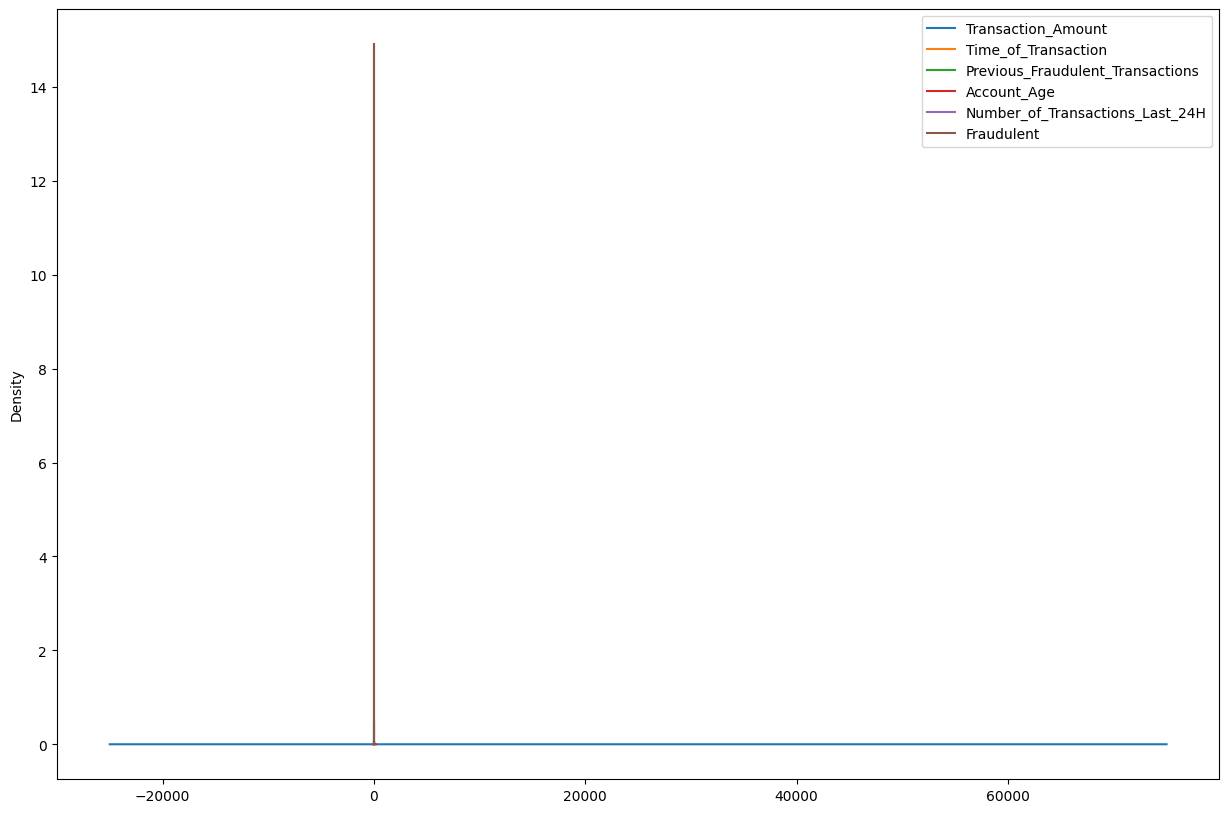

In [120]:
fraude.plot.density(figsize=(15, 10))

In [121]:
fraude

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,1292.76,16.0,0,119,13,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,1554.58,13.0,4,79,3,0,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,2395.02,12.0,3,115,9,0,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,100.10,15.0,4,3,4,0,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,2372.04,15.0,3,96,14,0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,1775.37,12.0,4,33,4,1,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False
49316,1368.90,12.0,3,81,2,1,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
49317,2225.91,16.0,1,103,9,1,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
49318,819.70,20.0,0,67,4,1,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False


Vamos começar convertendo as colunas geradas por one-hot encoding de valores booleanos para numericos

In [122]:
one_hot_cols = [
    'Transaction_Type_ATM Withdrawal',
    'Transaction_Type_Bank Transfer',
    'Transaction_Type_Bill Payment',
    'Transaction_Type_Online Purchase',
    'Transaction_Type_POS Payment',
    'Payment_Method_Credit Card',
    'Payment_Method_Debit Card',
    'Payment_Method_Invalid Method',
    'Payment_Method_Net Banking',
    'Payment_Method_UPI',
    'Payment_Method_Unknown',
    'Device_Used_Desktop',
    'Device_Used_Mobile',
    'Device_Used_Tablet',
    'Device_Used_Unknown Device'
]

fraude[one_hot_cols] = fraude[one_hot_cols].astype(int)

fraude

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,1292.76,16.0,0,119,13,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1554.58,13.0,4,79,3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2395.02,12.0,3,115,9,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,100.10,15.0,4,3,4,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,2372.04,15.0,3,96,14,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,1775.37,12.0,4,33,4,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
49316,1368.90,12.0,3,81,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
49317,2225.91,16.0,1,103,9,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
49318,819.70,20.0,0,67,4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns = [
    'Transaction_Amount',
    'Time_of_Transaction',
    'Account_Age',
    'Number_of_Transactions_Last_24H',
    'Previous_Fraudulent_Transactions'
]

minmax = MinMaxScaler()
fraude[columns] = minmax.fit_transform(fraude[columns])


In [124]:
display(fraude)

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,0.025758,0.695652,0.00,1.000000,0.923077,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.030995,0.565217,1.00,0.661017,0.153846,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.047807,0.521739,0.75,0.966102,0.615385,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.001902,0.652174,1.00,0.016949,0.230769,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,0.047347,0.652174,0.75,0.805085,1.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,0.035412,0.521739,1.00,0.271186,0.230769,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
49316,0.027281,0.521739,0.75,0.677966,0.076923,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
49317,0.044424,0.695652,0.25,0.864407,0.615385,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
49318,0.016296,0.869565,0.00,0.559322,0.230769,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


A variável alvo "Fraudulent" ja está eem escala adequada.

Quanto as outras variáveis utilizamos o MinMaxScaler para padronizar todas as variáveis entre 0-1, uniformizar a escala entre todas as variáveis e simplificar a interpretação.

<Axes: ylabel='Density'>

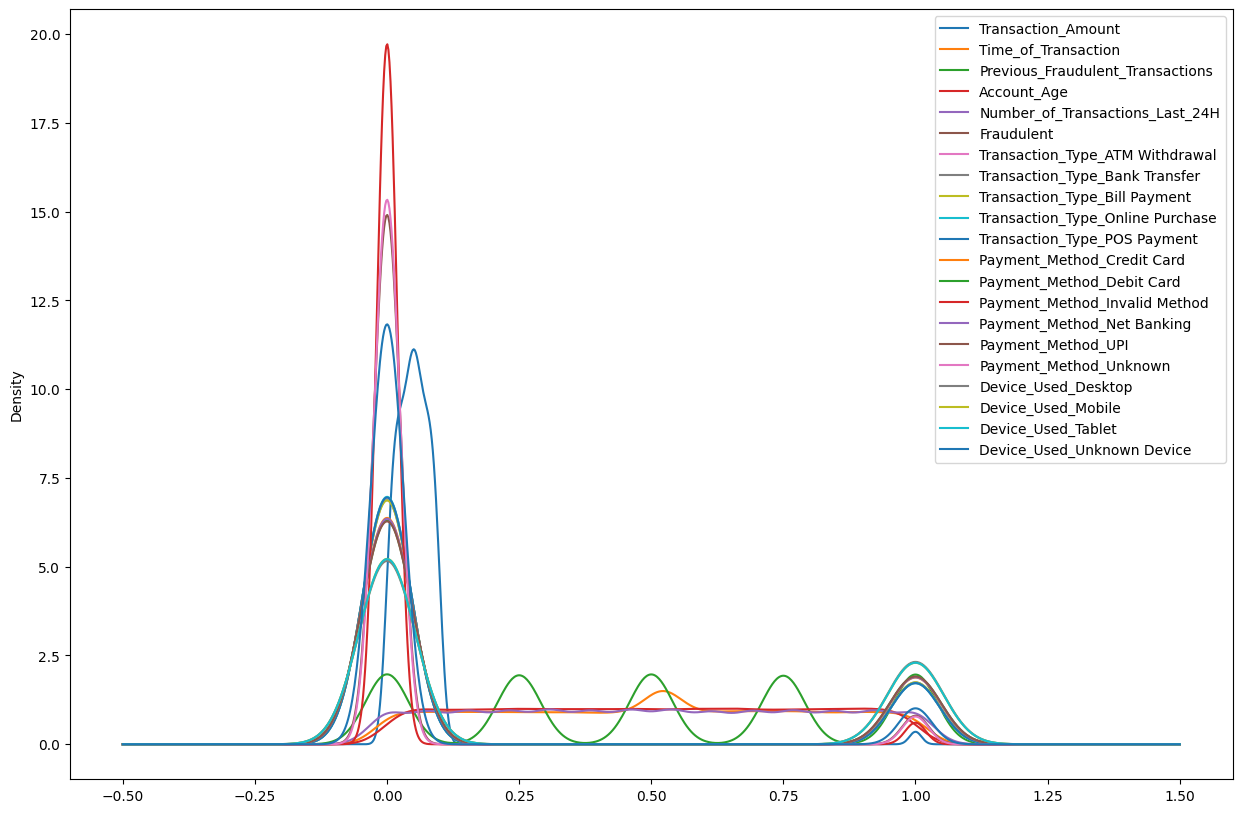

In [125]:
fraude.plot.density(figsize=(15, 10))

# Salvando o dataset

In [ ]:
fraude

,Transaction_ID,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,T1,4174,0.025758,0.695652,0.00,1.000000,0.923077,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,T2,4507,0.030995,0.565217,1.00,0.661017,0.153846,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,T3,1860,0.047807,0.521739,0.75,0.966102,0.615385,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,T4,2294,0.001902,0.652174,1.00,0.016949,0.230769,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,T6,2095,0.047347,0.652174,0.75,0.805085,1.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,T10076,2798,0.035412,0.521739,1.00,0.271186,0.230769,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
49316,T8854,4617,0.027281,0.521739,0.75,0.677966,0.076923,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
49317,T3468,3176,0.044424,0.695652,0.25,0.864407,0.615385,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
49318,T15074,3212,0.016296,0.869565,0.00,0.559322,0.230769,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
fraude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49100 entries, 0 to 49319
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_Amount                49100 non-null  float64
 1   Time_of_Transaction               49100 non-null  float64
 2   Previous_Fraudulent_Transactions  49100 non-null  float64
 3   Account_Age                       49100 non-null  float64
 4   Number_of_Transactions_Last_24H   49100 non-null  float64
 5   Fraudulent                        49100 non-null  int64  
 6   Transaction_Type_ATM Withdrawal   49100 non-null  int64  
 7   Transaction_Type_Bank Transfer    49100 non-null  int64  
 8   Transaction_Type_Bill Payment     49100 non-null  int64  
 9   Transaction_Type_Online Purchase  49100 non-null  int64  
 10  Transaction_Type_POS Payment      49100 non-null  int64  
 11  Payment_Method_Credit Card        49100 non-null  int64  
 12  Payment_M

In [ ]:
fraude

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device
0,0.025758,0.695652,0.00,1.000000,0.923077,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.030995,0.565217,1.00,0.661017,0.153846,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.047807,0.521739,0.75,0.966102,0.615385,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.001902,0.652174,1.00,0.016949,0.230769,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,0.047347,0.652174,0.75,0.805085,1.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,0.035412,0.521739,1.00,0.271186,0.230769,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
49316,0.027281,0.521739,0.75,0.677966,0.076923,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
49317,0.044424,0.695652,0.25,0.864407,0.615385,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
49318,0.016296,0.869565,0.00,0.559322,0.230769,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
caminho_salvar = '/content/drive/MyDrive/Trabalho Aprendizado de maquina /Fraud Detection Dataset/Fraud_Detection_Cleaned.csv'

fraude.to_csv(caminho_salvar, index=False)